<AxesSubplot: >

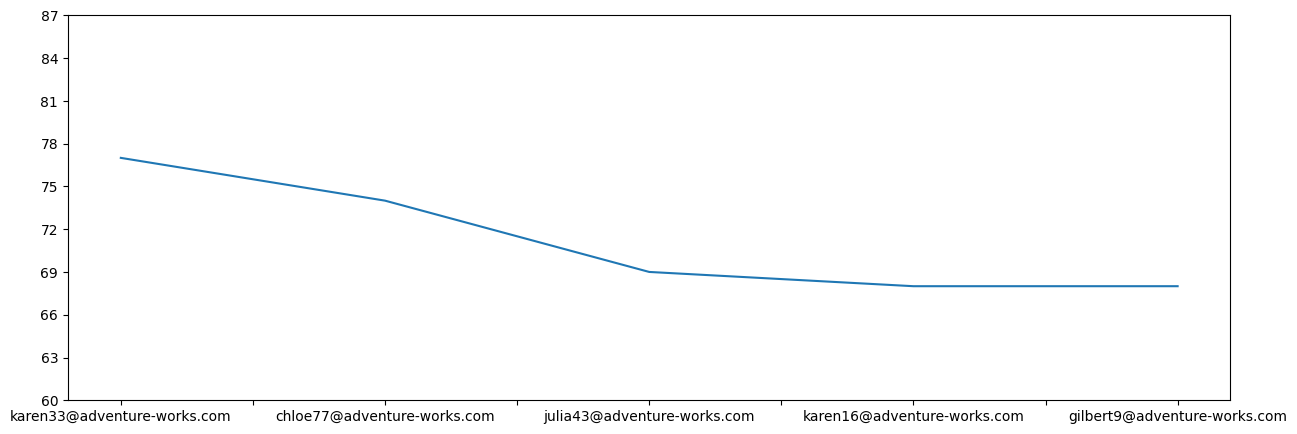

In [7]:
import pandas as pd

# fazendo a leitura das tabelas e atribuindo as variaveis
## dt_promo = pd.read_csv(r'E:\Programas\Projetos-Python\Pandas\Contoso - Promocoes.csv', sep=';')
df_produtos = pd.read_csv(r'E:\Programas\Projetos-Python\Pandas\Contoso - Cadastro Produtos.csv', sep=';')
df_clientes = pd.read_csv(r'E:\Programas\Projetos-Python\Pandas\Contoso - Clientes.csv', sep=';')
df_lojas = pd.read_csv(r'E:\Programas\Projetos-Python\Pandas\Contoso - Lojas.csv', sep=';')
df_vendas2017 = pd.read_csv(r'E:\Programas\Projetos-Python\Pandas\Contoso - Vendas  - 2017.csv', sep=';')


# tirar as colunas escolhidas como argumentos. Usando axis=0 para linhas and axis=1 for colunas 
## dt_clientes = dt_clientes.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)

# pegar apenas as colunas desejadas como argumento
coluna_desejada_clientes = ['ID Cliente', 'E-mail']
df_clientes = df_clientes[coluna_desejada_clientes]

coluna_desejada_produtos = ['ID Produto', 'Nome da Marca']
df_produtos = df_produtos[coluna_desejada_produtos]

coluna_desejada_lojas = ['ID Loja', 'Nome da Loja']
df_lojas = df_lojas[coluna_desejada_lojas]

# agrupar os dataframes desejados. Precisamos que o dataframe base tenha uma coluna que seja igual ao outro dataframe que sera adicionado, so assim ele vai identificar as informacoes certas nas linhas certas
df_vendas2017 = df_vendas2017.merge(df_produtos, on='ID Produto')
df_vendas2017 = df_vendas2017.merge(df_clientes, on='ID Cliente')
df_vendas2017 = df_vendas2017.merge(df_lojas, on='ID Loja')

# alterar o nome de alguma coluna - dataframe.rename(columns={'nome da coluna' : 'novo nome'})   {}
df_vendas2017 = df_vendas2017.rename(columns={'E-mail' : 'E-mail do Cliente'})

# contar quantas vezes aparece determinado valor - dataframe['nome da coluna'].value_counts()
quantidade_cliente = df_vendas2017['E-mail do Cliente'].value_counts()

# .plot() é para mostrar o gráfico. 
# figsize=(largura, altura) é para definir o tamanho da imagem, ir testando até achar um tamanho bom
# yticks=range(inicio, final, pulando de x em x) moldar os números da verticar (y)
quantidade_cliente[:5].plot(figsize=(15, 5), yticks=range(60, 90, 3))




#print(df_vendas2017)
#print(dt_clientes[:4])
#print(df_produtos[:4])
#print(df_lojas[:4])




    - sum() significa que vc quer somar - ele irá somar todos os valores de cada coluna
    - .groupby('indice') é para agrupar uma tabela pelo índice indicado
    - como ele se torna índice, n precisamos pedir para ele aparecer. Ele sempre aparecerá

In [12]:
soma_venda_loja = df_vendas2017.groupby('Nome da Loja').sum()
soma_venda_loja = soma_venda_loja[['Quantidade Vendida']]
soma_venda_loja

C:\Users\Léo\AppData\Local\Temp\ipykernel_10808\3759243458.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soma_venda_loja = df_vendas2017.groupby('Nome da Loja').sum()


,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


    - Para pegar o maior valor:
        - ordernar os valores:
            - .sort_value('indice') - indicar qual indice usará como base para ordenar a tabela
            - .sort_value('indice', ascending=False) - ascending= é usado para alterar para crescente ou decrescente. Padrão True - crescente
        - pegar o maior valor diretamente:
            - .max() e .idxmax()
    - Mudar o tipo de gráfico:
        - kind='bar'

<AxesSubplot: xlabel='Nome da Loja'>

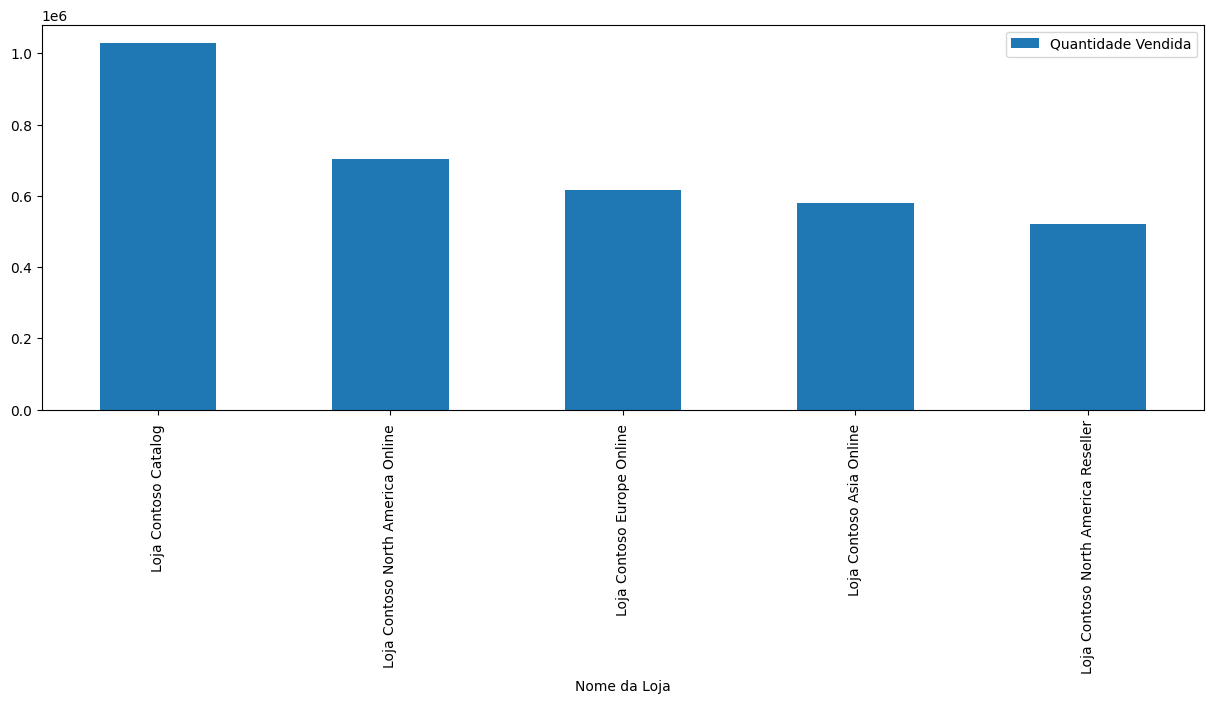

In [24]:
# ordenando os valores:
soma_venda_loja = soma_venda_loja.sort_values('Quantidade Vendida', ascending=False)
soma_venda_loja[:5].plot(figsize=(15, 5), kind='bar')

In [32]:
# maior valor:
valor_loja_mais_vendeu = soma_venda_loja['Quantidade Vendida'].max()
# indice do maior valor:
nome_loja_mais_vendeu = soma_venda_loja['Quantidade Vendida'].idxmax()
print(nome_loja_mais_vendeu, valor_loja_mais_vendeu)

Loja Contoso Catalog  1029117
